<a href="https://colab.research.google.com/github/adalbertii/Modele-regresyjne/blob/main/mpg-case-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analiza modeli neuronowych**

Wykorzystanie danych  [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).


Demonstracja sposobu budowania modelu przeznaczonego do predykcji efektywnosci spalania paliwa.

Tok działania:
- pobranie danych i ich wstępna analiza
- uproszczona standaryzacja danych
- budowa modelu opratego na jednym neuronie i jednym atrybucie (zmiennej objaśnijającej)
- budowa modelu składającego się z jednego neurona i wykorzystującego wszystkie zmienne objaśniajace
- budowa modelu składajacego się z 64 neuronó i jednej zmiennej objaśniajacej
-budowa modelu 64 neronowego ze wsystkimi zmiennymi objaśniajacymi

In [1]:
!pip install -q seaborn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


np.set_printoptions(precision=3, suppress=True)

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.0


### Pobranie danych do uczenia modelu
Wykorzystanie modułu pandas


In [58]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Liczba cylindrow', 'Pojemność skokowa', 'Moc', 'Waga',
                'Przyspieszenie', 'Rok modelu', 'Pochodzenie']
# mpg - miles per gallon
raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [59]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Liczba cylindrow,Pojemność skokowa,Moc,Waga,Przyspieszenie,Rok modelu,Pochodzenie
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [6]:
dataset.head(20)

,MPG,Liczba cylindrow,Pojemność skokowa,Moc,Waga,Przyspieszenie,Rok modelu,Pochodzenie
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


In [7]:
## sprawdzamy charakterystykę atrybutów
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MPG                398 non-null    float64
 1   Liczba cylindrow   398 non-null    int64  
 2   Pojemność skokowa  398 non-null    float64
 3   Moc                392 non-null    float64
 4   Waga               398 non-null    float64
 5   Przyspieszenie     398 non-null    float64
 6   Rok modelu         398 non-null    int64  
 7   Pochodzenie        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


Atrybut 'pochodzenie' wymaga uwagi. To jest ukryta zmienna kategoryczna

In [8]:
dataset.describe()

,MPG,Liczba cylindrow,Pojemność skokowa,Moc,Waga,Przyspieszenie,Rok modelu,Pochodzenie
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
dataset.corr()['MPG'].sort_values(ascending=False)


MPG                  1.000000
Rok modelu           0.579267
Pochodzenie          0.563450
Przyspieszenie       0.420289
Liczba cylindrow    -0.775396
Moc                 -0.778427
Pojemność skokowa   -0.804203
Waga                -0.831741
Name: MPG, dtype: float64

In [10]:
import plotly.express as px

In [ ]:

#px.histogram(dataset, width=1400, height=800, nbins=50)

px.histogram(dataset, x='MPG', width=1000, height=400, nbins=50, facet_col='Pochodzenie')

In [ ]:
px.histogram(dataset, x='MPG', width=1000, height=400, nbins=50, facet_col='Liczba cylindrow')

In [ ]:
px.histogram(dataset, x='Rok modelu', width=1000, height=400, nbins=50)

### Wstępne przygotowanie danych




In [12]:
# sprawdzamy czy występują braki danych
dataset.isna().sum()

MPG                  0
Liczba cylindrow     0
Pojemność skokowa    0
Moc                  6
Waga                 0
Przyspieszenie       0
Rok modelu           0
Pochodzenie          0
dtype: int64

Istnieją braki danych.
Dla uproszczenia usuwamy rekordy zawierajace braki danych

In [60]:
dataset = dataset.dropna()

In [54]:
dataset.isna().sum()

MPG                  0
Liczba cylindrow     0
Pojemność skokowa    0
Moc                  0
Waga                 0
Przyspieszenie       0
Rok modelu           0
Pochodzenie          0
dtype: int64

In [55]:
# sprawdzenie czy występują duplikaty

dataset[dataset.duplicated()]

,MPG,Liczba cylindrow,Pojemność skokowa,Moc,Waga,Przyspieszenie,Rok modelu,Pochodzenie


Kolumna 'Pochodzenie` jet atrybutem kategorycznym, nie numerycznym .
Nalezy zatem przeprowadić na tej kolumnie transfomację "one-hot-encod".
W tym celu wykorzystana zostanie  metoda [pd.get_dummies]

In [61]:
dataset['Pochodzenie'] = dataset['Pochodzenie'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [17]:
dataset.head(5)

,MPG,Liczba cylindrow,Pojemność skokowa,Moc,Waga,Przyspieszenie,Rok modelu,Pochodzenie
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [62]:
# bardzo ważna operacja kodowania zmiennej kategorycznej 'Pochodzenie'
dataset = pd.get_dummies(dataset,  columns=['Pochodzenie'], prefix='',prefix_sep='') ###
dataset.tail()

,MPG,Liczba cylindrow,Pojemność skokowa,Moc,Waga,Przyspieszenie,Rok modelu,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,1


### Podział danych na dane treningowe i testowe

Dane testowe zostaną wykorzystane do końcowej ewaluacji modelu

In [63]:
dataset.shape

(392, 9)

In [64]:
# operacja zwraca 80% danych wybranych losowo)
train_dataset = dataset.sample(frac=0.8, random_state=0)

# usuwamy rekordy o indexach przydzilonych do rekordów z poprzedniej operacji
test_dataset = dataset.drop(train_dataset.index)

In [65]:
train_dataset.shape

(314, 9)

In [66]:
test_dataset.shape

(78, 9)

### Wstępna analiza danych



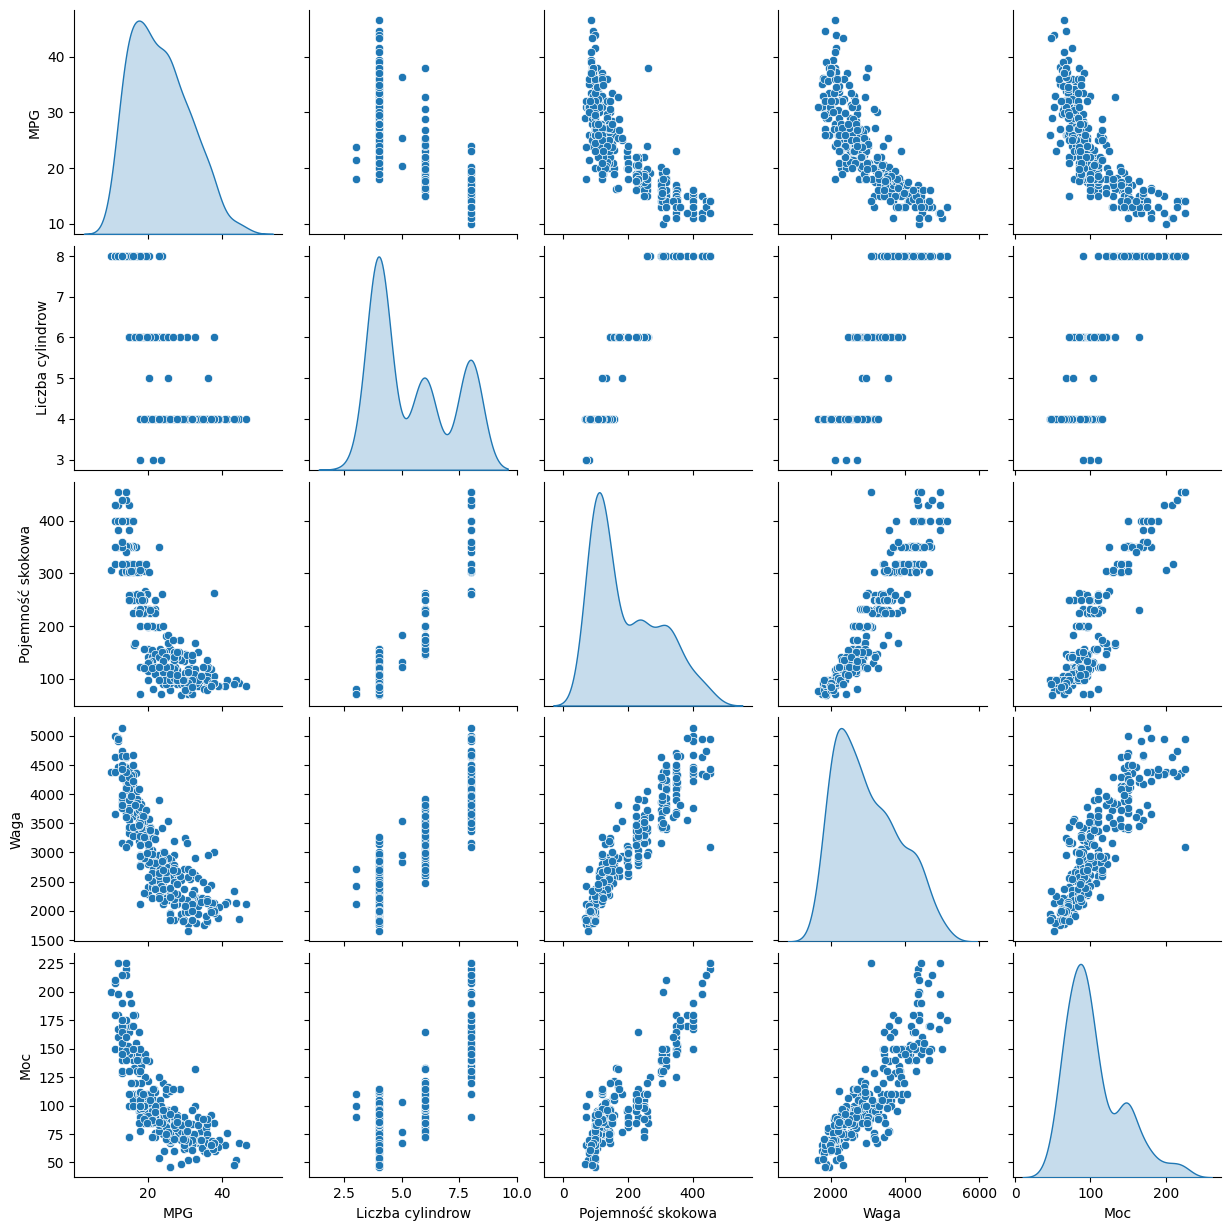

In [31]:
sns.pairplot(train_dataset[['MPG', 'Liczba cylindrow', 'Pojemność skokowa', 'Waga','Moc']], diag_kind='kde')

Weryfikacja rozkładów statystycznych zmiennych objaśniajacych

In [24]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Liczba cylindrow,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Pojemność skokowa,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Moc,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Waga,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Przyspieszenie,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Rok modelu,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


### Rozdzielenie zmiennych objaśniajacych od zmiennej objaśnianej (etykiety)


In [67]:
# najpierw same cechy (zmienne objaśniajaće)
train_features = train_dataset.copy()
test_features = test_dataset.copy()



In [27]:
train_features.head(5)

,MPG,Liczba cylindrow,Pojemność skokowa,Moc,Waga,Przyspieszenie,Rok modelu,Europe,Japan,USA
146,28.0,4,90.0,75.0,2125.0,14.5,74,0,0,1
282,22.3,4,140.0,88.0,2890.0,17.3,79,0,0,1
69,12.0,8,350.0,160.0,4456.0,13.5,72,0,0,1
378,38.0,4,105.0,63.0,2125.0,14.7,82,0,0,1
331,33.8,4,97.0,67.0,2145.0,18.0,80,0,1,0


In [68]:
# teraz tzw. etykiety, czyli zmenne objaśniane
# operacja poniższa zwraca warosci kolumny 'MPG' , jedocześnie usuwając tąkolumnę z ramki danych
train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [69]:
train_features.shape

(314, 8)

In [70]:
train_features

,Liczba cylindrow,Pojemność skokowa,Moc,Waga,Przyspieszenie,Rok modelu,Japan,USA
146,4,90.0,75.0,2125.0,14.5,74,0,1
282,4,140.0,88.0,2890.0,17.3,79,0,1
69,8,350.0,160.0,4456.0,13.5,72,0,1
378,4,105.0,63.0,2125.0,14.7,82,0,1
331,4,97.0,67.0,2145.0,18.0,80,1,0
...,...,...,...,...,...,...,...,...
281,6,200.0,85.0,2990.0,18.2,79,0,1
229,8,400.0,180.0,4220.0,11.1,77,0,1
150,4,108.0,93.0,2391.0,15.5,74,1,0
145,4,83.0,61.0,2003.0,19.0,74,1,0


In [ ]:
train_labels

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, Length: 314, dtype: float64

## Normalizacja danych



In [ ]:
# najpierw sprawdzam jak bardzo zróznicowane wartościowo są poszczególne atrybury
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Liczba cylindrow,5.477707,1.699788
Pojemność skokowa,195.318471,104.331589
Moc,104.869427,38.096214
Waga,2990.251592,843.898596
Przyspieszenie,15.559236,2.789230
Rok modelu,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101



Wartość średnia i odchylenie standardowe jest mocno żróżnicowane.

Dobrą praktyką jest normalizacja cech, które używają różnych skal i zakresów.

Jednym z powodów, dla których jest to ważne, jest to, że cechy są mnożone przez wagi modelu. Tak więc skala wyników i skala gradientów zależy od skali danych wejściowych.

Chociaż model *może* uczyć  się bez normalizacji cech, normalizacja sprawia, że szkolenie jest znacznie bardziej stabilne.


### Warstwa normalizująca  dane

Tworzymy instancję normalizatora

In [71]:
normalizer = tf.keras.layers.Normalization(axis=-1)

Dokonujemy normalizacji zmiennych objaśniajacych :

In [72]:
# metoda wymaga obiektu np.array
normalizer.adapt(np.array(train_features))

Gdy warstwa jest wywoływana, zwraca dane wejściowe, z każdą cechą niezależnie znormalizowaną:

In [73]:
# demonstracja działania normalizotora
# pobieramy 1 wiersz
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('Wiersz przed normalizacja:', first)
  print()
  print('Wiersz znormalizowany    :', normalizer(first).numpy())

Wiersz przed normalizacja: [[   4.    90.    75.  2125.    14.5   74.     0.     1. ]]

Wiersz znormalizowany    : [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.5   0.78]]


## Regresja liniowa

Przed zbudowaniem głebokiej sieci neuronowej przeanalizujemu budowę liniowej sieci z jedną i wieloma cechami (zmiennymi objaśniajacymi)

### Regresja lionowa z jedną zmienną objaśniajacą

Predykcja 'MPG' na podstwie zmiennej 'Moc'.

Sieć neuronowa będzie zbudowana z dwóch warstw:

- warstwy normalizującej atrybut wejściowy 'moc` (przy użyciu klasy  `tf.keras.layers.Normalization).
- warstwy Dense

In [74]:
horsepower = np.array(train_features['Moc'])
horsepower


array([ 75.,  88., 160.,  63.,  67.,  90.,  60.,  67.,  95.,  88.,  60.,
       180.,  88., 150., 155.,  75., 115., 150.,  90.,  90., 129., 110.,
        90., 110.,  76., 165.,  92.,  88., 100., 150., 122.,  74.,  76.,
        67., 110.,  90.,  65., 150., 150., 220., 165.,  67.,  75., 140.,
        78., 149.,  84., 150., 145., 100.,  75., 170., 200.,  72.,  78.,
        76.,  88., 105.,  53.,  86.,  95.,  75.,  71., 198.,  69., 105.,
       215.,  88.,  87.,  65.,  60.,  68., 129., 145.,  95., 153.,  70.,
       145.,  68.,  70., 100.,  70.,  81.,  95., 225.,  90.,  97., 100.,
        65., 110.,  89., 150., 110.,  95.,  85.,  97.,  60.,  88.,  52.,
        70., 198.,  71.,  90.,  72.,  63., 115.,  90., 135.,  52., 150.,
       170.,  58.,  96., 125.,  92.,  95.,  90.,  95.,  82., 110.,  78.,
        67., 208., 105., 130., 150.,  46.,  90.,  64.,  75.,  85.,  72.,
        95.,  90., 145.,  88., 167., 120., 190.,  78.,  49.,  86., 150.,
        70., 107.,  80., 150., 105., 100., 145.,  8

In [75]:
horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

Budowa modelu Keras

In [76]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


Po zbudowaniu modelu należy go skompilować.

Na tym etapie kluczowy jest dobór hiperparametrów modelu:
*   'loss'
*   'optimizer'



In [77]:
horsepower_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Proces uczenia modelu

In [79]:
%%time

# zmienna history będzie zawierała pełną charakterystyką zrealziowanego procesu uczenia
history = horsepower_model.fit(
    train_features['Moc'],
    train_labels,
    epochs=100,
    verbose=1,
    validation_split = 0.2) #Oblicza wyniki walidacji na 20% danych treningowych

Epoch 1/100
8/8 [==============================] - 0s 24ms/step - loss: 3.8044 - val_loss: 4.1776
Epoch 2/100
8/8 [==============================] - 0s 15ms/step - loss: 3.8088 - val_loss: 4.1741
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 3.8074 - val_loss: 4.2062
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 3.8028 - val_loss: 4.1971
Epoch 5/100
8/8 [==============================] - 0s 14ms/step - loss: 3.8028 - val_loss: 4.1768
Epoch 6/100
8/8 [==============================] - 0s 13ms/step - loss: 3.8037 - val_loss: 4.1719
Epoch 7/100
8/8 [==============================] - 0s 11ms/step - loss: 3.8084 - val_loss: 4.2075
Epoch 8/100
8/8 [==============================] - 0s 8ms/step - loss: 3.8040 - val_loss: 4.2016
Epoch 9/100
8/8 [==============================] - 0s 10ms/step - loss: 3.8023 - val_loss: 4.1858
Epoch 10/100
8/8 [==============================] - 0s 9ms/step - loss: 3.8061 - val_loss: 4.1786
Epoch 11/100
8/8 [===

Wizualizacja procesu uczenia przy użyciu statystyk zapisanych w obiekcie `history`.

In [80]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.803672,4.192120,95
96,3.801411,4.186207,96
97,3.805837,4.156338,97
98,3.803967,4.172311,98
99,3.811733,4.222197,99


In [81]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

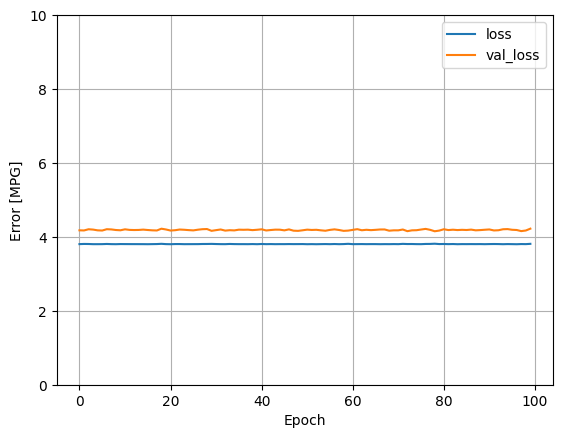

In [82]:
plot_loss(history)

In [ ]:
horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [ ]:
# wyświetlimy wyznaczone współczynniki wagowe modelu

wagi = horsepower_model.get_weights()
wagi

[104.869446,
 1446.6993,
 314,
 array([[-6.359]], dtype=float32),
 array([22.544], dtype=float32)]

Zachowanie rezultatów na poźniejsze porównania

In [42]:
# tworzymy słownik dla oceny wskażników ewaluacyjnych (stopnia dokładności predykcyjnej modelu)
test_results = {}

# obliczamy współczynnik loss dla danych testowych
test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Moc'], # dane dla jednej zmiennej objaśnijacej
    test_labels, verbose=1) # etykiety dla danych tesowych

3/3 [==============================] - 0s 4ms/step - loss: 3.6409


In [ ]:
#wynik (loss) dla danych tesowych , dla modelu z jednym neuronem
test_results

{'horsepower_model': 3.6556193828582764}

Ponieważ jest to regresja pojedynczej zmiennej, łatwo jest wyświetlić prognozy modelu jako funkcję danych wejściowych.

In [43]:
# generujemy dane" testowe"
x = tf.linspace(0.0, 250, 251)


In [44]:
# dokonujemy predykcji MPG na podstwie danych testowych
y = horsepower_model.predict(x)

8/8 [==============================] - 0s 2ms/step


In [45]:
y

array([[40.34 ],
       [40.171],
       [40.002],
       [39.832],
       [39.663],
       [39.494],
       [39.324],
       [39.155],
       [38.986],
       [38.816],
       [38.647],
       [38.478],
       [38.308],
       [38.139],
       [37.97 ],
       [37.801],
       [37.631],
       [37.462],
       [37.293],
       [37.123],
       [36.954],
       [36.785],
       [36.615],
       [36.446],
       [36.277],
       [36.108],
       [35.938],
       [35.769],
       [35.6  ],
       [35.43 ],
       [35.261],
       [35.092],
       [34.922],
       [34.753],
       [34.584],
       [34.414],
       [34.245],
       [34.076],
       [33.907],
       [33.737],
       [33.568],
       [33.399],
       [33.229],
       [33.06 ],
       [32.891],
       [32.721],
       [32.552],
       [32.383],
       [32.214],
       [32.044],
       [31.875],
       [31.706],
       [31.536],
       [31.367],
       [31.198],
       [31.028],
       [30.859],
       [30.69 ],
       [30.521

In [ ]:
# definiuję procedurę do tworzenia wykresu
# wykres złożony  z danymi treningowymi  oraz wynikami predykcji dla danych "testowych"
def plot_horsepower(x, y):
  plt.scatter(train_features['Moc'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

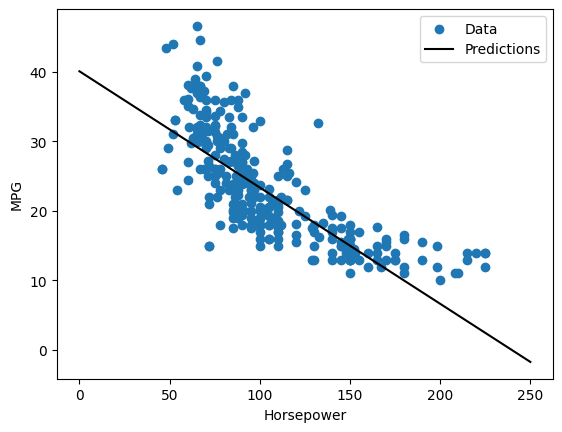

In [ ]:
plot_horsepower(x, y)

### Regresja liniowa z wieloma zmiennymi objaśniajacymi

Ponownie budujemy dwuetapowy model sekwencyjny Keras z pierwszą warstwą będącą normalizatorem (tf.keras.layers.Normalization(axis=-1)), który zdefiniowaliśmy wcześniej i dostosowali  do całego zbioru danych (wszystkie zmienne objaśniajace)


In [ ]:
# definujemy taki sam jak poprzednio model (taką samą topologię)
linear_model = tf.keras.Sequential([
    normalizer, # obiekt normalize zawieratym razem  znormalizowane wartości wszystkich atrybutów(zmiennych objasniających)
    layers.Dense(units=1)
])

In [ ]:
linear_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 9)                 19        
 on)                                                             
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
Total params: 29 (120.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 19 (80.00 Byte)
_________________________________________________________________


Kompilujemy model i przechodzimy do jego uczenia

In [ ]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
# ustawiam takie same wartości hiperparametrów jak poprzednio
%%time
history = linear_model.fit(
    train_features,# wszzystkie zmienne objasniajace
    train_labels,
    epochs=100,
    verbose=1,
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 1s 30ms/step - loss: 22.9148 - val_loss: 23.0020
Epoch 2/100
8/8 [==============================] - 0s 12ms/step - loss: 22.0661 - val_loss: 22.3107
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 21.2185 - val_loss: 21.5881
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 20.4330 - val_loss: 20.8651
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 19.5722 - val_loss: 20.1354
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 18.7737 - val_loss: 19.4298
Epoch 7/100
8/8 [==============================] - 0s 12ms/step - loss: 17.9376 - val_loss: 18.7011
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 17.1312 - val_loss: 17.9697
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - loss: 16.3048 - val_loss: 17.2584
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 15.4810 - val_loss: 16.5478
Epo

Wykorzystując wszystkie zmienne objaśniajace uzyskujemy znacznie niższy błąd treningowy i walidacyjny niż w poprzedniom modelu (`horsepower_model`)

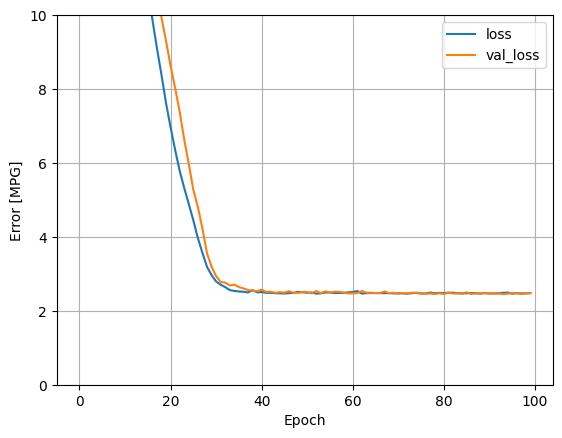

In [ ]:
plot_loss(history)

Zapisujemy wyniki ewaluacji modelu dla danych testowych

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=1)

3/3 [==============================] - 0s 5ms/step - loss: 2.4585


I porównajmy wskażniki ewaluacyjne dla dwóch modeli  z jedną zmienna objaśniającą i wieloma zmiennymi objasniającymi

In [ ]:
test_results

{'horsepower_model': 3.6556193828582764, 'linear_model': 2.4585461616516113}

## Regresja za pomocą sici głębokich [deep neural network (DNN)]


Zaimplementujemy  modele DNN z pojedynczym i wieloma wejściami.

Kod jest zasadniczo taki sam, z wyjątkiem tego, że model jest rozszerzony o niektóre "ukryte" warstwy nieliniowe.

Modele te będą zawierać kilka warstw więcej niż model liniowy:

Liniowa warstwa Dense z pojedynczym wyjściem.


*   Warstwa normalizacji, jak poprzednio (z horsepower_normalizer dla modelu z jednym wejściem i normalizer dla modelu z wieloma wejściami).

*   Dwie ukryte, nieliniowe warstwy Dense z nieliniowością funkcji aktywacji ReLU (relu).
*   Liniowa warstwa Dense z pojedynczym wyjściem.

Oba modele będą korzystać z tej samej procedury uczenia, więc metoda kompilacji jest zawarta w poniższej funkcji build_and_compile_model.

In [ ]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

### Regresja przy użyciu DNN i pojedynczego wejścia

Zbudujemy model DNN  tylko z `'Moc`` jako danymi wejściowymi i `horsepower_normalizer` (zdefiniowanym wcześniej) jako warstwą normalizacji

In [ ]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

Model ten ma o wiele więcej parametrów do wytrenowania niż modele liniowe

In [ ]:
dnn_horsepower_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4356 (17.02 KB)
Trainable params: 4353 (17.00 KB)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


Proces trenowania modelu (za pomocą metody  Keras `Model.fit`)

In [ ]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Moc'],
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 40ms/step - loss: 23.1606 - val_loss: 23.5331
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 22.9119 - val_loss: 23.2779
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 22.6697 - val_loss: 22.9987
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 22.3847 - val_loss: 22.6605
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 22.0302 - val_loss: 22.2375
Epoch 6/100
8/8 [==============================] - 0s 11ms/step - loss: 21.5828 - val_loss: 21.7018
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 21.0195 - val_loss: 21.0159
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 20.2921 - val_loss: 20.1503
Epoch 9/100
8/8 [==============================] - 0s 8ms/step - loss: 19.3803 - val_loss: 19.1046
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 18.3237 - val_loss: 17.9043
Epoch 

Ten model radzi sobie nieco lepiej niż jednowejściowy  model liniowy `horsepower_model`

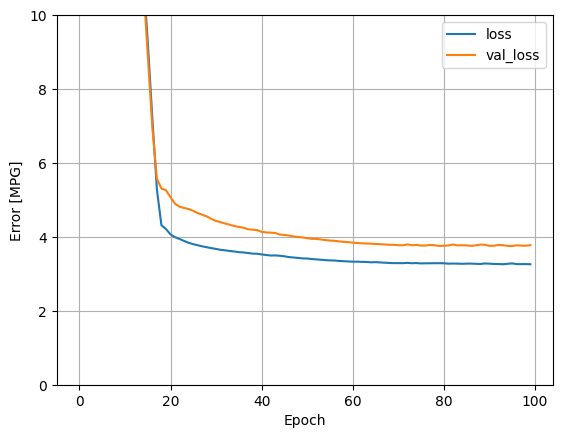

In [ ]:
plot_loss(history)

Jeśli wygenerujemy wykres predykcji ajko funkcji zmiennej 'Moc' łatwo zauważyć jak ten model wykorzystuje nieliniowość zapewnianą przez ukryte warstwy:

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = dnn_horsepower_model.predict(x)

8/8 [==============================] - 0s 3ms/step


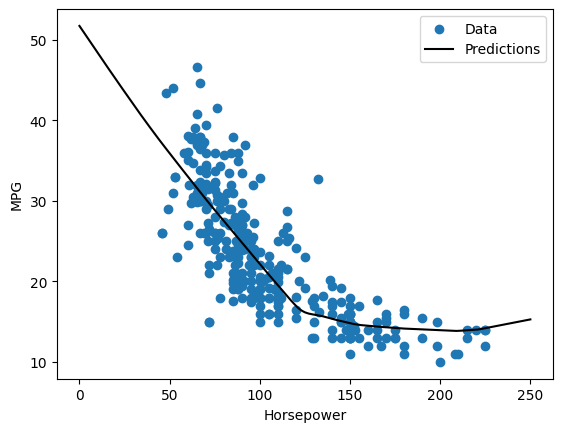

In [ ]:
plot_horsepower(x, y)

Zapisujemy rezultat ewaluacji dla tego modelu (na danych testowych)
Na końcu notebok- a przedstwimy porównaie tego wskażnika dla wszystkich modeli

In [ ]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Moc'], test_labels,
    verbose=0)

In [ ]:
test_results

{'horsepower_model': 3.6556193828582764,
 'linear_model': 2.4585461616516113,
 'dnn_horsepower_model': 2.9355671405792236}

### Regresja przy wykorzystaniu modelu DNN i wszystkich zmiennych objaśniajacych

Powtórzymy poprzedni proces, używając wszystkich dane wejściowe. Wydajność modelu nieznacznie poprawia się na zestawie danych walidacyjnych.

In [ ]:
# podajemy procedurze pełny normalizator (z wysztskimi zmiennymi objasniającymi)
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 9)                 19        
 on)                                                             
                                                                 
 dense_5 (Dense)             (None, 64)                640       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4884 (19.08 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 19 (80.00 Byte)
_________________________________________________________________


In [ ]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 27ms/step - loss: 23.3875 - val_loss: 23.4900
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 22.7401 - val_loss: 22.7950
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 22.0577 - val_loss: 22.0304
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 21.2702 - val_loss: 21.1052
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 20.3010 - val_loss: 19.9333
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 19.0383 - val_loss: 18.4192
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 17.4212 - val_loss: 16.4951
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 15.4811 - val_loss: 14.5745
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 13.5430 - val_loss: 12.7270
Epoch 10/100
8/8 [==============================] - 0s 9ms/step - loss: 11.3596 - val_loss: 10.4453
Epoch 11

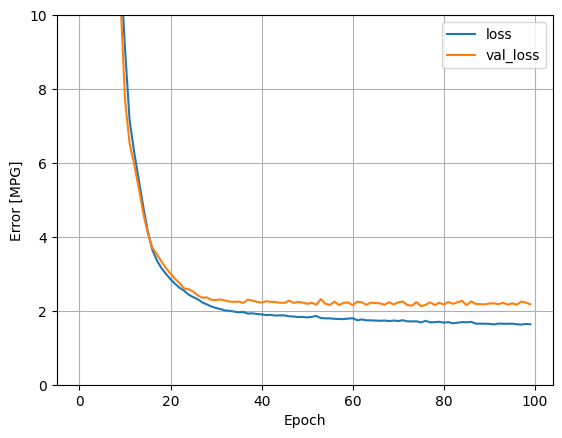

In [ ]:
plot_loss(history)

Zapisujemy rezultat ewaluacji tego modelu (dla danych testowych)

In [ ]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

## Porównanie wydajności zbudowanych modeli

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,3.655619
linear_model,2.458546
dnn_horsepower_model,2.935567
dnn_model,1.672923


### Predykcja

Dokonamy teraz predykcji za pomocą `dnn_model` **na zbiorze testowym** używając Keras `Model.predict`

3/3 [==============================] - 0s 4ms/step


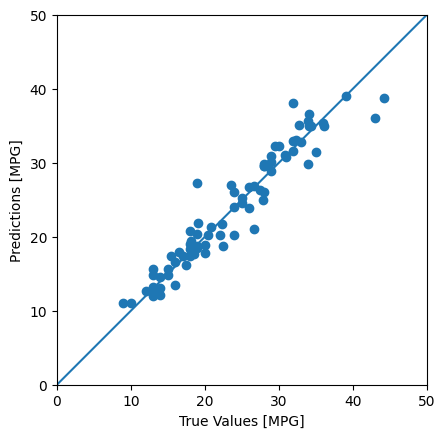

In [ ]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


Im bliższe skupienie punktów będących wynikami predykcji wokół prostej (rzeczywista wartosc =  przewidywna wartosc) tym lepiej

Wygląda na to, że model przewiduje dość dobrze.

Teraz należy sprawdzić rozkład błędów:

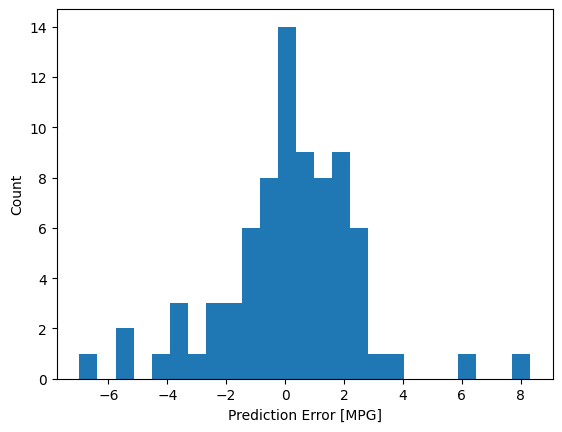

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')